In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid")

In [13]:

import pandas as pd
from datetime import datetime

# Cargar archivo Excel (ajusta el nombre si es diferente)
archivo = "Actualización Censo Resguardo Indigena de Guachucal - 2025.xlsx"
df = pd.read_excel(archivo, skiprows=6)

# Asegurar que los nombres de columnas estén limpios
df.columns = df.columns.str.strip()
print(df.columns.tolist())

# ============================
# 1. Total de personas censadas
# ============================
total_personas = len(df)
print("🔹 Total de personas censadas:", total_personas)

['VIGENCIA', 'RESGUARDO INDIGENA', 'COMUNIDAD INDIGENA', 'FAMILIA', 'TIPO IDENTIFICACION', 'NUMERO DOCUMENTO', 'NOMBRES', 'APELLIDOS', 'FECHA DE NACIMIENTO', 'PARENTESCO', 'SEXO', 'ESTADO CIVIL', 'PROFESION', 'ESCOLARIDAD', 'INTEGRANTES', 'DIRECCION', 'TELEFONO', 'USUARIO', 'CARNET', 'LUGAR DE ATENCIÓN']
🔹 Total de personas censadas: 8096


In [11]:

# ============================
# Total de núcleos familiares: cada grupo donde FAMILIA se repite exactamente 'INTEGRANTES' veces
# ============================

familias_validas = df.groupby('FAMILIA')['INTEGRANTES'].nunique()
total_familias = familias_validas[familias_validas == 1].count()
print("🔹 Total de núcleos familiares (según estructura de censo):", total_familias)


# ============================
# 3. Distribución por sexo
# ============================
sexo_dist = df['SEXO'].value_counts()
print("\n🔹 Distribución por sexo:\n", sexo_dist)

# ============================
# 4. Calcular edad y agrupar por rangos
# ============================
# Asegurar que las fechas estén en formato datetime y manejar errores
df['FECHA DE NACIMIENTO'] = pd.to_datetime(df['FECHA DE NACIMIENTO'], errors='coerce')

# Fecha actual
hoy = pd.to_datetime(datetime.today())

# Calcular la edad, ignorando fechas inválidas (NaT)
df['EDAD'] = ((hoy - df['FECHA DE NACIMIENTO']) / pd.Timedelta(days=365.25)).round().astype('Int64')

# Mostrar ejemplo
print(df[['NOMBRES', 'FECHA DE NACIMIENTO', 'EDAD']].head())

# Clasificar por rangos de edad
def clasificar_edad(edad):
    if pd.isna(edad): return "Desconocida"
    elif edad <= 5: return "0-5 años"
    elif edad <= 12: return "6-12 años"
    elif edad <= 17: return "13-17 años"
    elif edad <= 25: return "18-25 años"
    elif edad <= 59: return "26-59 años"
    else: return "60+ años"

df['RANGO_EDAD'] = df['EDAD'].apply(clasificar_edad)
rango_edad_dist = df['RANGO_EDAD'].value_counts().sort_index()
print("\n🔹 Distribución por rangos de edad:\n", rango_edad_dist)

# ============================
# 5. Promedio de integrantes por familia
# ============================
integrantes_por_familia = df.groupby('FAMILIA')['NUMERO DOCUMENTO'].count()
promedio_integrantes = round(integrantes_por_familia.mean(), 2)
print("\n🔹 Promedio de integrantes por familia:", promedio_integrantes)

# ============================
# 6. Familias numerosas (>5 personas)
# ============================
familias_numerosas = integrantes_por_familia[integrantes_por_familia > 5].count()
print("🔹 Familias numerosas (>5 integrantes):", familias_numerosas)

# (Opcional) Guardar análisis en archivo
resumen = {
    "Total Personas": [total_personas],
    "Total Familias": [total_familias],
    "Promedio Integrantes por Familia": [promedio_integrantes],
    "Familias Numerosas (>5)": [familias_numerosas]
}
resumen_df = pd.DataFrame(resumen)
resumen_df.to_excel("Resumen_Analisis_Demografico.xlsx", index=False)

🔹 Total de núcleos familiares (según estructura de censo): 171

🔹 Distribución por sexo:
 F     4306
M     3788
N        1
 M       1
Name: SEXO, dtype: int64
               NOMBRES FECHA DE NACIMIENTO  EDAD
0         MARIA YANETH          1986-01-05    39
1  FRANCISCO ALEXANDER          2008-05-25    17
2       KEVIN MAURICIO          2011-02-26    14
3        FRANCO DILBER          1991-06-12    34
4      OLGA DEL CARMEN          1967-04-27    58

🔹 Distribución por rangos de edad:
 0-5 años        352
13-17 años      541
18-25 años     1037
26-59 años     4254
6-12 años       702
60+ años       1202
Desconocida       8
Name: RANGO_EDAD, dtype: int64

🔹 Promedio de integrantes por familia: 14.46
🔹 Familias numerosas (>5 integrantes): 351


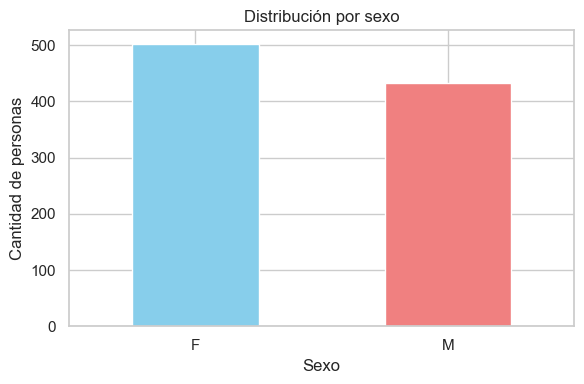

In [4]:
plt.figure(figsize=(6, 4))
sexo_dist.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Distribución por sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("grafico_sexo.png")
plt.show()

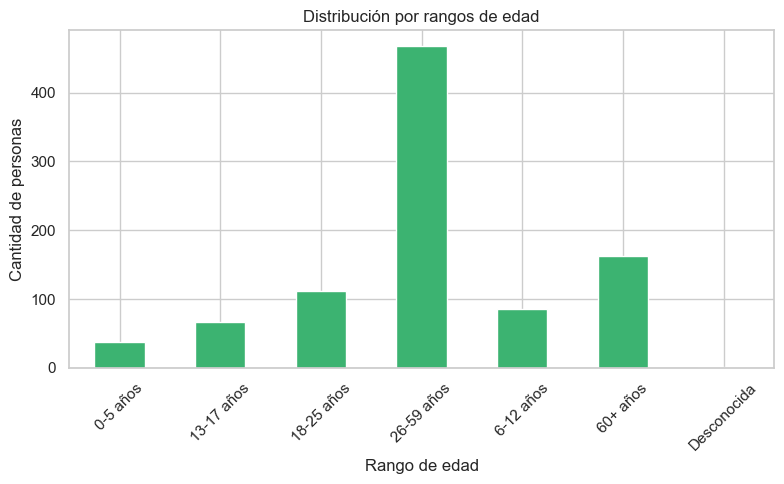

In [5]:
plt.figure(figsize=(8, 5))
rango_edad_dist.plot(kind='bar', color='mediumseagreen')
plt.title("Distribución por rangos de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("grafico_rangos_edad.png")
plt.show()


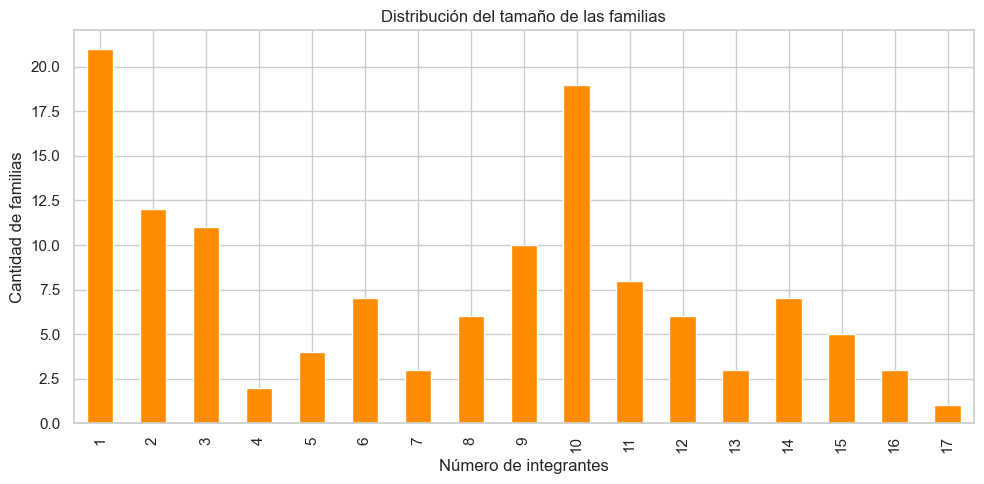

In [6]:
plt.figure(figsize=(10, 5))
integrantes_por_familia.value_counts().sort_index().plot(kind='bar', color='darkorange')
plt.title("Distribución del tamaño de las familias")
plt.xlabel("Número de integrantes")
plt.ylabel("Cantidad de familias")
plt.tight_layout()
plt.savefig("grafico_tamano_familias.png")
plt.show()


In [7]:
# Diccionario para traducir las abreviaciones a nombres completos
escolaridad_dict = {
    "NI": "Ninguno",
    "PR": "Primaria",
    "SE": "Secundaria",
    "TE": "Técnico",
    "TL": "Tecnólogo",
    "UN": "Universitario",
    "ES": "Especialización",
    "MG": "Maestría"
}

🔹 Distribución por nivel educativo:
 Primaria         513
Secundaria       240
Ninguno           93
Universitario     50
Técnico            4
Tecnólogo          2
Name: ESCOLARIDAD_NOMBRE, dtype: int64


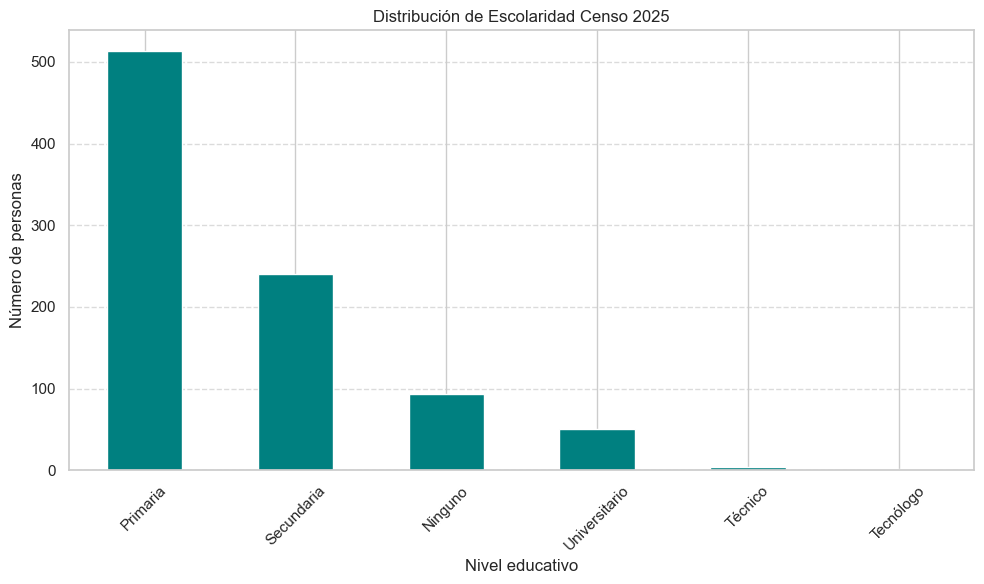

In [8]:
# Reemplazar códigos por nombres legibles
df['ESCOLARIDAD_NOMBRE'] = df['ESCOLARIDAD'].map(escolaridad_dict)

# Contar por categoría
escolaridad_dist = df['ESCOLARIDAD_NOMBRE'].value_counts().sort_values(ascending=False)

# Mostrar conteo
print("🔹 Distribución por nivel educativo:\n", escolaridad_dist)

# Gráfico de barras
plt.figure(figsize=(10,6))
escolaridad_dist.plot(kind='bar', color='teal')
plt.title('Distribución de Escolaridad Censo 2025')
plt.xlabel('Nivel educativo')
plt.ylabel('Número de personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()